## Assignment 9 - 25th oct 2022

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Machine Learning\all lab assignments\data.csv")

In [3]:
data.head()

,feature1,feature2
0,-0.625302,-0.170064
1,0.960695,0.590901
2,-0.598543,-0.402593
3,-2.228059,-0.532577
4,-0.461430,-0.498867


In [4]:
data.shape

(200, 2)

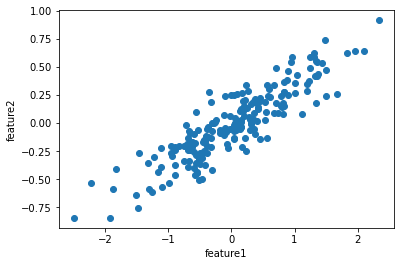

In [5]:
plt.scatter(data['feature1'],data['feature2'])
plt.xlabel('feature1')
plt.ylabel('feature2');
data['feature1']=data['feature1']-data['feature1'].mean()
data['feature2']=data['feature2']-data['feature2'].mean()

In [6]:
data_cov = data.cov()

In [7]:
data_cov

,feature1,feature2
feature1,0.682178,0.230935
feature2,0.230935,0.098832


In [8]:
u,v = np.linalg.eig(data_cov)

In [9]:
u

array([0.7625315, 0.0184779])

In [10]:
v

array([[ 0.94446029, -0.32862557],
       [ 0.32862557,  0.94446029]])

In [11]:
u=np.sort(u)[::-1]

In [12]:
u

array([0.7625315, 0.0184779])

In [13]:
A=[x for x in v]
A

[array([ 0.94446029, -0.32862557]), array([0.32862557, 0.94446029])]

In [14]:
Ak=np.matrix(A)

In [15]:
Ak

matrix([[ 0.94446029, -0.32862557],
        [ 0.32862557,  0.94446029]])

In [16]:
data.shape

(200, 2)

In [9]:
def PCA(X,num_of_components):
    X_meaned = X-np.mean(X,axis=0)
    cov_mat = np.cov(X_meaned,rowvar=False)
    eigen_values,eigen_vectors=np.linalg.eigh(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_of_components]
    X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).T
    return X_reduced,sorted_eigenvectors

In [18]:
data_reduced =PCA(data,2)[0]

In [19]:

data_reduced.shape

(200, 2)

In [20]:
df_reduced = pd.DataFrame(data_reduced,columns=['PC1','PC2'])

In [21]:
princ_axis = PCA(data,2)[1]
princ_axis

array([[-0.94446029,  0.32862557],
       [-0.32862557, -0.94446029]])

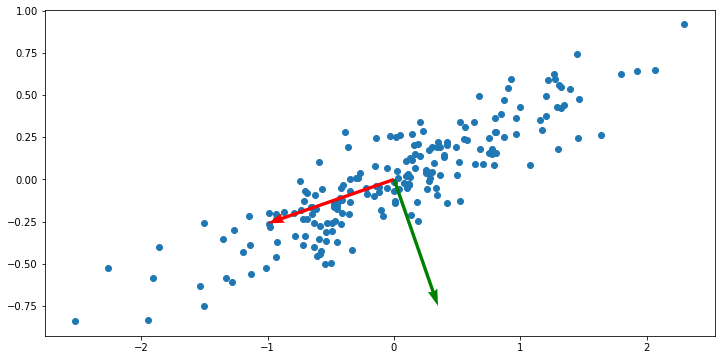

In [23]:
data_ = np.array(data)
plt.figure(figsize=(12,6))
#sns.scatterplot(x="feature1", y="feature2", data=data)
plt.scatter(data_[:,0],data_[:,1])
plt.quiver(0,0,princ_axis.T[0][0], princ_axis.T[0][1] ,scale=5, color=['r'], width=0.005, label="PC1")
plt.quiver(0,0, princ_axis.T[1][0],princ_axis.T[1][1] ,scale=5, color=['g'], width=0.005, label="PC2")
plt.show()

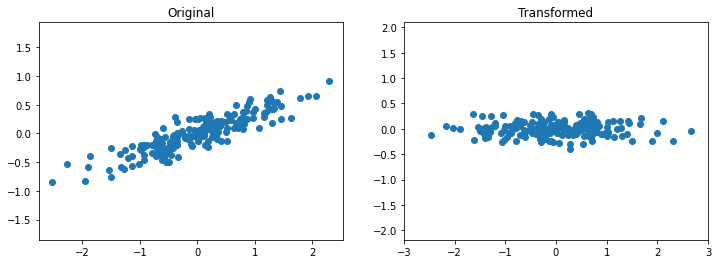

In [24]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].axis('equal')
#axes[0].scatter(data_[:,0], data_[:,1])
axes[0].scatter(data['feature1'], data['feature2'])
axes[1].axis('equal')
axes[1].set_xlim(-3,3)
axes[1].scatter(df_reduced['PC1'], df_reduced['PC2'])
axes[0].set_title("Original")
axes[1].set_title("Transformed");

# diabetes dataset

In [4]:
diabetes = pd.read_csv(r"C:\Users\Venkatesh Yeturi\OneDrive\Desktop\Class pdfs\Machine Learning\all lab assignments\diabetes.csv")

In [5]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
diabetes_x = diabetes.drop(columns=['Outcome'])
diabetes_y = diabetes['Outcome']

In [13]:
diabetes_reduced = PCA(diabetes_x,2)[0]

In [18]:
diabetes_df = pd.DataFrame(diabetes_reduced,columns=['PC1','PC2'])

In [27]:
diabetes_df_final = pd.concat([diabetes_df,diabetes_y],axis=1)

,PC1,PC2,Outcome
0,75.714655,-35.950783,1
1,82.358268,28.908213,0
2,74.630643,-67.906496,1
3,-11.077423,34.898486,0
4,-89.743788,-2.746937,1
5,80.977922,-3.946887,0
6,-4.350959,46.933912,1
7,82.137294,7.097954,0
8,-468.866389,-31.528258,1
9,80.193850,-18.048283,1


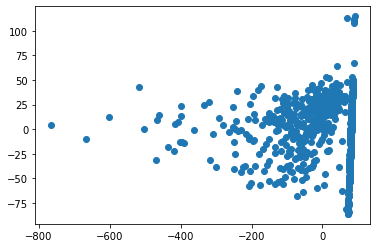

In [30]:
plt.scatter(diabetes_df_final['PC1'],diabetes_df_final['PC2'])